In [78]:
import joblib
import numpy as np
import pandas as pd
import os
import sys
import torch
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../")

In [79]:
all_prototypes = torch.load("../artifacts/all_protos.pt")
pretrained_dict = torch.load('../Models/finegrained_nli_bart_prototex_sst2')

In [80]:
classfn_model_weights = pretrained_dict['classfn_model.weight']

In [81]:
best_protos_per_testeg = joblib.load("../artifacts/best_protos_per_testeg.joblib")
best_protos_per_traineg = joblib.load("../artifacts/best_protos_per_traineg.joblib")
best_protos_per_adv = joblib.load("../artifacts/best_protos_per_adv.joblib")
bestk_train_data_per_proto = joblib.load("../artifacts/bestk_train_data_per_proto.joblib")

In [87]:
best_protos_per_traineg[0][:, 0]

tensor([41,  7, 45,  ..., 32, 47,  4])

Text(0.5, 0.98, 'Distribution of prototypes most similar to a given example')

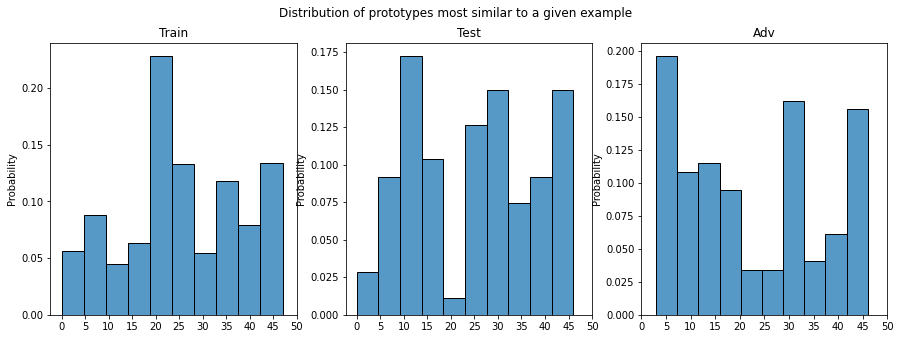

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(best_protos_per_traineg[0][:, 0], bins=10, stat="probability", label="train", ax=axs[0])
axs[0].set_title("Train")
axs[0].set_xticks(np.arange(0, 51, 5))

sns.histplot(best_protos_per_testeg[0][:, 0], bins=10, stat="probability", label="test", ax=axs[1])
axs[1].set_title("Test")
axs[1].set_xticks(np.arange(0, 51, 5))

sns.histplot(best_protos_per_adv['adv_test.csv'][0][:, 0], bins=10, stat="probability", label="adv", ax=axs[2])
axs[2].set_title("Adv")
axs[2].set_xticks(np.arange(0, 51, 5))

fig.suptitle("Distribution of prototypes most similar to a given example")

Text(0.5, 0.98, 'Distribution of distances to prototypes most similar to a given example')

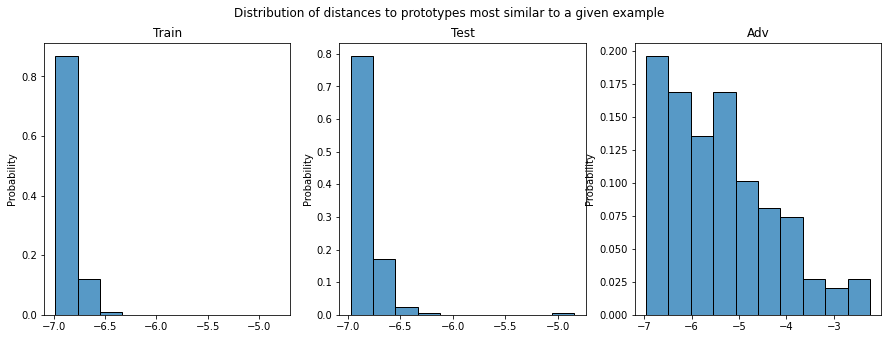

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(best_protos_per_traineg[1][:, 0], bins=10, stat="probability", label="train", ax=axs[0])
axs[0].set_title("Train")

sns.histplot(best_protos_per_testeg[1][:, 0], bins=10, stat="probability", label="test", ax=axs[1])
axs[1].set_title("Test")

sns.histplot(best_protos_per_adv['adv_test.csv'][1][:, 0], bins=10, stat="probability", label="adv", ax=axs[2])
axs[2].set_title("Adv")

fig.suptitle("Distribution of distances to prototypes most similar to a given example")

In [103]:
prototypes_close_to_adv_instances = best_protos_per_adv['adv_test.csv'][0][:, 0]
prototypes_close_to_train_instances = best_protos_per_traineg[0][:, 0]
prototypes_close_to_test_instances = best_protos_per_testeg[0][:, 0]
colors = []
for i in range(len(all_prototypes)):
    if i in prototypes_close_to_train_instances:
        colors.append('blue')
    elif i in prototypes_close_to_test_instances:
        colors.append('green')
    elif i in prototypes_close_to_adv_instances:
        colors.append('red')
    else:
        colors.append('grey')

In [104]:
len(colors)

50

(50, 2)


Text(0.5, 1.0, 'Prototypes in 2D space')

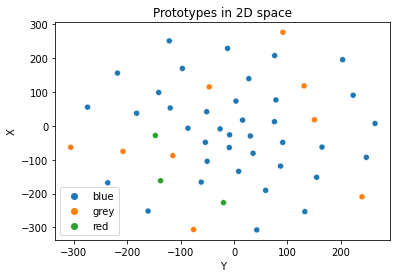

In [110]:
from sklearn.manifold import TSNE
all_protos = all_prototypes.reshape(50, -1)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2)
all_protos_transformed = tsne.fit_transform(all_protos)
print(all_protos_transformed.shape)

proto_df = {
    "X": all_protos_transformed[:,0].tolist(),
    "Y": all_protos_transformed[:,1].tolist()
}
sns.scatterplot(data=proto_df, x="Y", y="X", hue=colors)
plt.title("Prototypes in 2D space")

In [61]:
train_distances = best_protos_per_traineg[1].flatten()
test_distances = best_protos_per_testeg[1].flatten()
adv_distances = best_protos_per_adv["adv_test.csv"][1].flatten()

Text(0.5, 1.0, 'Adv')

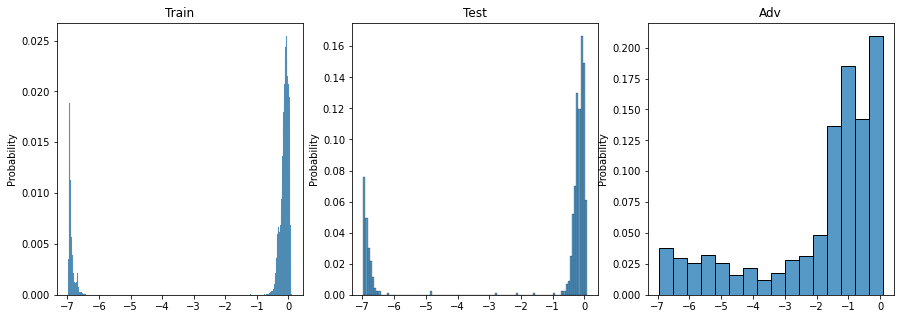

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train_distances, label="train", stat="probability", ax=axs[0])
axs[0].set_title("Train")

sns.histplot(test_distances, label="test", stat="probability", ax=axs[1])
axs[1].set_title("Test")

sns.histplot(adv_distances, label="adv", stat="probability", ax=axs[2])
axs[2].set_title("Adv")

In [63]:
test_predictions = pd.read_csv("../Logs/test_predictions.csv")
adv_predictions = pd.read_csv("../Logs/adv_predictions.csv")

In [64]:
adv_indices_with_wrong_prediction = adv_predictions[adv_predictions["predictions"] != adv_predictions["labels"]].index.tolist()

In [74]:
adv_instances_prototypes = best_protos_per_adv["adv_test.csv"][0][adv_indices_with_wrong_prediction]
adv_instances_distances = best_protos_per_adv["adv_test.csv"][1][adv_indices_with_wrong_prediction]